In [1]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore

In [2]:
car_data = pd.read_csv("car_data.csv")
car_data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


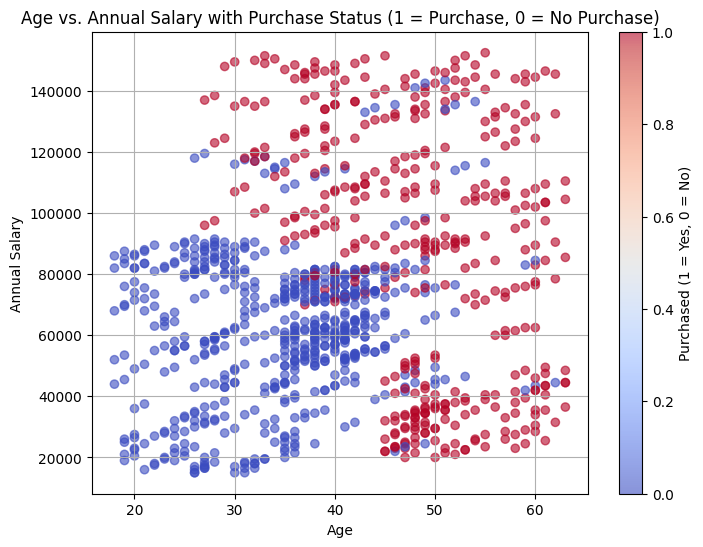

In [3]:
# 1. Age vs. Annual Salary Scatter Plot with Purchase Status
plt.figure(figsize=(8,6))
plt.scatter(car_data['Age'], car_data['AnnualSalary'], c=car_data['Purchased'], cmap='coolwarm', alpha=0.6)
plt.title('Age vs. Annual Salary with Purchase Status (1 = Purchase, 0 = No Purchase)')
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.colorbar(label='Purchased (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()

In [4]:
car_data['Gender'] = car_data['Gender'].map({'Male': 1.0, 'Female': -1.0})
x = car_data[["AnnualSalary", "Age", "Gender"]]
y = car_data["Purchased"]
x

,AnnualSalary,Age,Gender
0,20000,35,1.0
1,43500,40,1.0
2,74000,49,1.0
3,107500,40,1.0
4,79000,25,1.0
...,...,...,...
995,59000,38,1.0
996,23500,47,-1.0
997,138500,28,-1.0
998,134000,48,-1.0


In [5]:
from sklearn.model_selection import train_test_split # type: ignore

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000)

In [7]:
reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Function to ask user input and predict purchase status
def predict_purchase():
    try:
        # Asking user for inputs
        gender = input("Enter gender (Male/Female): ").strip().capitalize()
        if gender not in ['Male', 'Female']:
            raise ValueError("Invalid gender input.")
        
        salary = float(input("Enter annual salary: "))
        age = int(input("Enter age: "))

        # Mapping gender to numerical value
        gender_mapped = 1.0 if gender == 'Male' else -1.0

        # Creating input array
        user_data = np.array([[salary, age, gender_mapped]])

        # Making prediction
        prediction = reg.predict(user_data)

        # Output result
        if prediction[0] == 1:
            print("The model predicts that the user is likely to purchase.")
        else:
            print("The model predicts that the user is unlikely to purchase.")

    except ValueError as ve:
        print(f"Error: {ve}")

In [9]:
# Run the function
predict_purchase()


The model predicts that the user is likely to purchase.


c:\Users\aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
# accuracy checking
from sklearn.metrics import accuracy_score


# Make predictions on the test set
y_pred = reg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")


Accuracy of the model: 86.50%
